# Introduction to Machine Learning Based on the Use Case Energy Prediction


## Table of contents:


* ###  1. Introduction
* ###  2. Overview and data loading
* ###  3. Visualization
* ###  4. Missing values and outliers
* ###  5. Splitting of the dataset
* ###  6. Linear Regression
* ###  7. Random Forest Regressor
* ###  8. Support Vector Regression
* ###  9. Comparison of the results
* ### 10. Deployment of the chosen model

## 1. Introduction 

Within this exercise we want to show the implementation of a supervised learning procedure with the necessary pre- and post-processing steps using the use case of the energy prediction of a machining process.

Our goal is to perform a regression analysis using the data that we have to train with different regression models to predict the target variable. In our use case we want to predict the energy requirement to perform a milling process.

#### 1.1 Motivation for energy prediction

1. Creation of transparency and implementation of energy planning
2. Adaptation and optimization of the process parameters according to the energy requirement
3. Possibility of load management
4. Detection of deviations due to the comparison of the prediction and the actual energy profile




```
`# This is formatted as code`
```

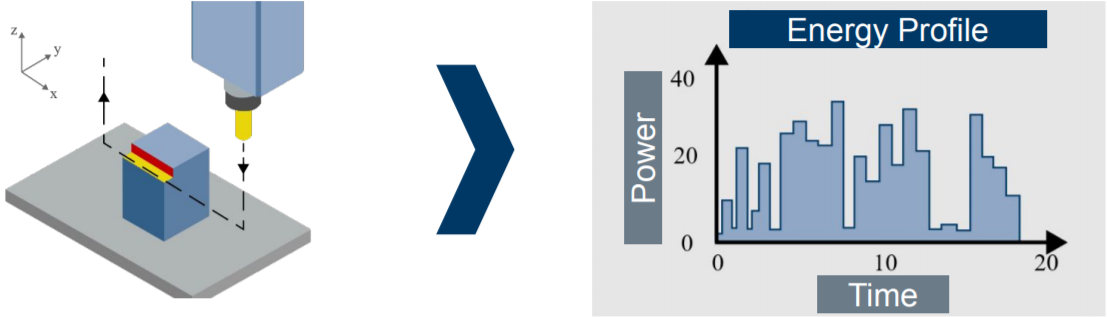

Based on the planned process parameters, the energy required for the milling process is to be forecasted. As a basis for the development of a regression model, trains were carried out on a milling machine to gain sufficient data for the training.

#### 1.2 Structure of a milling machine

Using the Cartesian coordinate system, a machine can be controlled along each axis. Based on each axis, you typically get the following movements from the perspective of an operator facing the machine:
- X axis allows movement “left” and “right”
- Y axis allows movement “forward” and “backward”
- Z axis allows movement “up” and “down”

0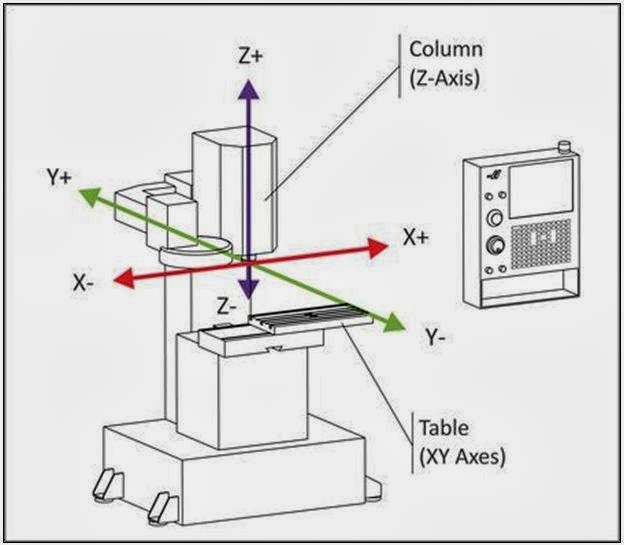

Based on these movements, the right tool and other process parameters (feed, etc.) we can perform the required milling process.

Saját:
Feed or Feed rate refers to the speed at which YOU force the workpiece or the cutting tool onto the work piece.
vagy, gépbe adagolt anyag

#### 1.3 Deliverables
To complete this exercise successfully, you need to provide certain results. Throughout the notebook you will find **questions** (with solutions), and coding **tasks** where you need to modify existing code or fill in blanks. Coding tasks can be solved by modifying or inserting code in the cells below the task. If necessary, you can add extra cells to the notebook, as long as the order of the existing cells remains unchanged. Once you are finished with the lab, you can submit it through the procedure described in the forum.

Example:

>**Question:** What do I do if I am stuck solving this lab?

>**Solution:** <span style="color:white">The correct solution for the question to self-check your answer.</span>

#### 1.4 Resources
If you are having issues while completing this lab, feel free to post your questions in the forum. Your peers as well as our teaching advisors will screen the forum regularly and answer open questions. This way, the information is available for fellow students encountering the same issues.

Note: Here we also want to promote the work with online resources and thus the independent solution of problems. For some tasks you have to "google" for the appropriate method yourself. For other tasks the already given code must be adapted or just copied.

## 2. Data loading and first overview

* The given data is stored in a text file containing the following columns,

  * Axis
  * Feed [mm/min]
  * Path [mm]
  * Energy requirement - Target variable [kJ]

#### 2.1 Loading the data

First we have to load the necessary libraries. 

In [1]:
# importing the necessary libraries
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

# setting white grid background
sns.set_style('whitegrid')
%matplotlib notebook
%matplotlib inline

The next step is to access the prepared data set.

There are different options to import a data set into Google Colab. You can either import/upload from Google Drive or from your own HDD. In this Notebook the Google Drive folder is used.

For this purpose it is necessary to connect your Google Drive to this Notebook. Execute the following cell and folllow the instructions.


In [ ]:
# eredetileg Google Colab-ban történő tanulásra szánták ezt a Notebook-t,
# tanuláshoz én jobban preferáltam helyi IDE-ben történő feldolgozást (kivéve modellek), így a következő cellában helyileg olvastam be a txt-t

#from google.colab import drive
#drive.mount('/content/drive')

Following we can load the data.

In [ ]:
# specification of the path to the input data (this path may vary for you depending on where you have saved your data file)
df = pd.read_csv(r'E:\Gazdinfo\4. félév FAU\tárgyak\MLE\Exercises\Regression for Energy Prediction\regression dataset_energy_measurement.txt')

#df_ami_eredetileg_itt volt = pd.read_csv(r'./drive/MyDrive/ML4Eng I/ML4Eng_I_Exercise_Pipeline_and_Regression/ML4Eng_I_dataset_energy_measurement.txt')
# if the link doesn't work, you'll need to adjust it depending on where you have stored the dataset in your Google Drive.

#### 2.1 Overview of the data

After that we need an overview of the dataset.

In [ ]:
# statistical analysis of the dataset
df.describe()
# ahol a count nem 226 (ennyi az összes sor, energy_req-nél egyik sornál sincs NaN), az azért van, mert ott annyi sorban van NaN: 
# NaN: Not a Number - ez most nem a hiányzó értéket jelöli, hanem tényleg NaN-ek vannak van a csv-ben, viszont szerintem ugyanúgy eggyel kevesebb lenne a count ha teljesen hiányozna az érték 

,Axis,Feed,Path,Energy_Requirement
count,224.000000,225.000000,225.000000,226.000000
mean,2.093750,1759.200000,1.644444,0.060063
std,1.447173,887.559998,43.726604,0.163246
min,-5.000000,20.000000,-200.000000,-0.272149
25%,1.000000,1000.000000,-30.000000,0.012769
50%,2.000000,2000.000000,10.000000,0.038630
75%,3.000000,2500.000000,40.000000,0.063981
max,15.000000,3000.000000,150.000000,0.900000


><font color='white'>**Question:** Discuss the results of the pandas `describe()` function.</font> 

><font color='white'> **Solution:** The above code gives us a descriptive statistic of the pandas dataframe which summarizes the central tendency, dispersion (szóródás) and shape of a dataset’s distribution, excluding null values. Now we try to learn more about the data that we have to understand if we need to make any changes i.e. remove outliers, add missing values etc.  
1. Count: The total number of entries in that particular column. Here we see that the different features have a different count indicating some missing values in the dataset.  
2. Mean: The arithmetic mean (or simply mean) of a list of numbers, is the sum of all of the numbers divided by the number of numbers
3. Standard deviation:  A measure of the dispersion or variation in a distribution or set of data ||  variance: varianca, szórás négyzete | standard deviaton: szórás (normál szórás alapvetően , de mintánál is szerintem, azaz standard hiba - átlag mintavételi szórása) | deviation: eltérés (pl átlagtól) "Variance is the average squared deviations from the mean, while standard deviation is the square root of this number."
4. Minimum: The smallest mathematical value in that particular section. For the attribute "axis" a value of -5 is listed indicating an outlier.  
5. 25%: The values corresponding to 25% percentile of the dataset  
6. 50%: The values corresponding to 50% percentile of the dataset. The 50 % percentile is the same as the median.  
7. 75%: The values corresponding to 75% percentile of the dataset  
8. Maximum: The largest mathematical value in that particular section. For the attribute "axis" a value of 15 is listed indicating an oulier.      
More information can be found here - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html
<br></font>

><font color='white'>**Task:** Search and implement a (simple) method in order to show the first rows of the dataset. Try to use Google/ the documentation to find an appropriate one.</font> 

In [ ]:
# implementation of the method

#############################
# Please add your code here #
#############################
        
df.head(5)

,Axis,Feed,Path,Energy_Requirement
0,-1.0,20.0,120.0,0.600000
1,-5.0,100.0,150.0,0.700000
2,10.0,150.0,130.0,0.800000
3,15.0,50.0,-200.0,0.900000
4,1.0,500.0,10.0,0.009795


## 3. Visualization 

Below all attributes of the data set are plotted.

><font color='white'>**Question:** Why is visualization of the input data important?</font>
<br>

><font color='white'>**Solution:**  
1. Identify potential patterns in the data that can help us understand the data.  
2. Clarify which factors influence our target variable the most.  
3. Helps us fix the dataset in case there are outliers and missing values.  
4. Help us to decide which models to use to successfully predict the target variable.
<br></font>

In [ ]:
# saját, értelmezéshez 
a = np.arange(0,5,step = 1) #step: spacing between values
print(a)

b = np.linspace(0,5, num= 3) #num: number of samples to generate
print(b)

[0 1 2 3 4]
[0.  2.5 5. ]


0.9
[-0.2721495  -0.15493455 -0.0377196   0.07949535  0.1967103   0.31392525
  0.4311402   0.54835515  0.6655701   0.78278505  0.9       ]


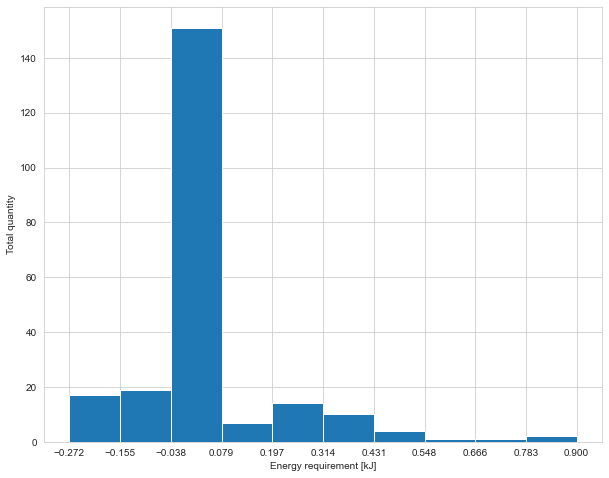

In [70]:
# plotting the target variable "Energy requirement"
%matplotlib inline
plt.figure(figsize=(10,8)) # figsize : (float, float), default: figure.figsize. Width, height in inches.

plt.hist(df.Energy_Requirement, bins=10, range = (df.Energy_Requirement.min(), df.Energy_Requirement.max()))
# az adatot, amit plottolni akarunk (azaz a magassága a hisztogram oszlopainak), a hist x paramétereként adjuk meg

print(df.Energy_Requirement.max())

plt.xlabel('Energy requirement [kJ]')
plt.ylabel('Total quantity')

# saját kiegészítés matplotlib dokumentáció alapján, így szerintem sokkal szemléletesebb a diagram
plt.xticks(np.linspace(df.Energy_Requirement.min(), df.Energy_Requirement.max(), 11))

print(np.linspace(df.Energy_Requirement.min(), df.Energy_Requirement.max(), 11))

Text(0, 0.5, 'Total quantity')

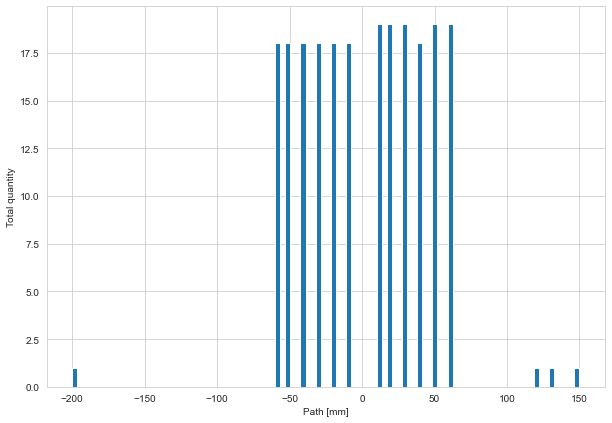

In [71]:
# plotting the attribute "Path"
%matplotlib inline
plt.figure(figsize=(10,7))

plt.hist(df.Path, bins = 100, range = (df.Path.min(), df.Path.max()))

plt.xlabel('Path [mm]')
plt.ylabel('Total quantity')


><font color='white'> **Task:** Make same changes to the plot below. For example, you can adjust the number of bins, the name of the axis or the color of the plott </font>
<br>
pl. color: color = 'green'

In [72]:
# saját, értelmezéshez 
df["Axis"]

0      -1.0
1      -5.0
2      10.0
3      15.0
4       1.0
       ... 
221     2.0
222     2.0
223     2.0
224     2.0
225     2.0
Name: Axis, Length: 226, dtype: float64

Text(0, 0.5, 'Total quantity')

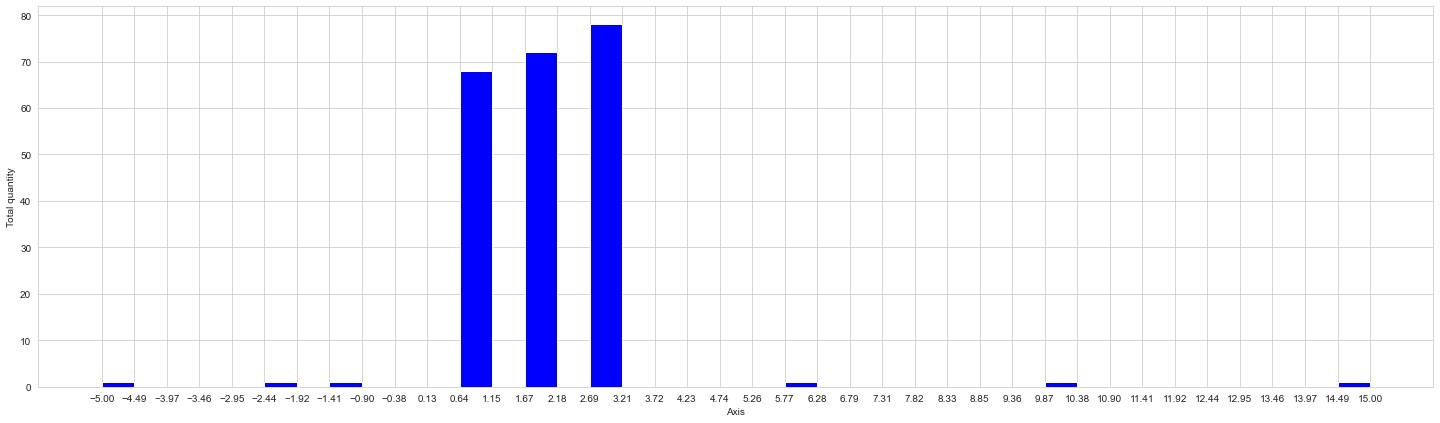

In [73]:
# plotting the attribute "Axis"
%matplotlib inline
plt.figure(figsize=(25,7))
plt.hist(df.Axis, bins=39, range=(df.Axis.min(), df.Axis.max()), color="blue")

# saját kiegészítés matplotlib dokumentáció alapján, így szerintem sokkal szemléletesebb a diagram
plt.xticks(np.linspace(df.Axis.min(), df.Axis.max(), 40))

plt.xlabel('Axis')
plt.ylabel('Total quantity')

><font color='white'>**Task:** Visualize the last attribute "Feed" according to the previous ones. You can copy the most of the code, nevertheless you have to do some adjustments.
</font> 
<br>

Text(0, 0.5, 'Total quantity')

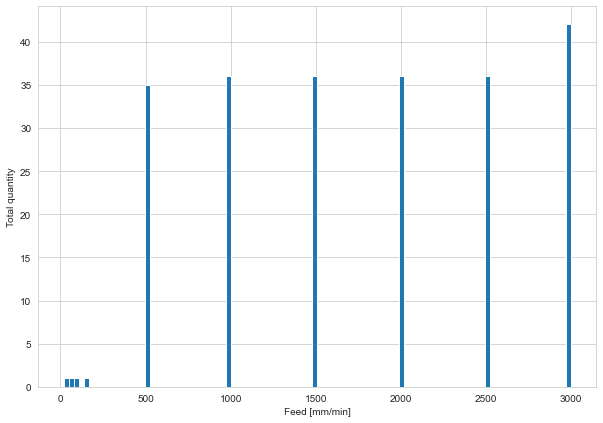

In [74]:
# plotting the attribue "Feed"

#############################
# Please add your code here #
#############################
        
%matplotlib inline
plt.figure(figsize=(10,7))

plt.hist(df.Feed, bins = 100, range = (df.Feed.min(), df.Feed.max()))

plt.xlabel('Feed [mm/min]')
plt.ylabel('Total quantity')


## 4. Missing values and outliers

1. Missing values can be NaN (Not a Number) or breaks in the dataset that do not seem reasonable.
2. Outliers are values in our dataset that stand out from rest of the values in our dataset, an outlier may lie in an abnormal distance from other values in a distribution.

Missing values and outliers have to be detected and dealt with in order to prepare the data set for the following steps.

#### 4.1 Handling missing value

In [75]:
# Before we deal with missing values we visualize the first 10 instances of the data set.
# Missing values can be recognized here as NaN.
df.head(10)

,Axis,Feed,Path,Energy_Requirement
0,-1.0,20.0,120.0,0.600000
1,-5.0,100.0,150.0,0.700000
2,10.0,150.0,130.0,0.800000
3,15.0,50.0,-200.0,0.900000
4,1.0,500.0,10.0,0.009795
5,6.0,NaN,20.0,0.019462
6,NaN,500.0,30.0,0.029309
7,-2.0,500.0,NaN,0.038570
8,NaN,500.0,50.0,0.048310
9,1.0,500.0,60.0,0.057808


><font color='white'>**Task:** Use the the `dropna()` function to remove all rows with missing values. Use the documantation if you need further information about this method.
</font> 
<br>

In [76]:
# We drop all rows with missing values using the 'dropna function'

#############################
# Please add your code here #
#############################
        

df = df.dropna(subset=['Axis', 'Feed', 'Path']) 
# a subset-tel adjuk meg, hogy melyik oszlopokban keresse a hiányzó értéket vagy NaN-t, és amelyik sorban ilyet talál, azt törli teljesen


# After the removal of missing values we visualize the first 10 instances of the data set again.
df.head(10)

,Axis,Feed,Path,Energy_Requirement
0,-1.0,20.0,120.0,0.600000
1,-5.0,100.0,150.0,0.700000
2,10.0,150.0,130.0,0.800000
3,15.0,50.0,-200.0,0.900000
4,1.0,500.0,10.0,0.009795
9,1.0,500.0,60.0,0.057808
10,1.0,1000.0,10.0,0.010401
11,1.0,1000.0,20.0,0.020560
12,1.0,1000.0,30.0,0.030982
13,1.0,1000.0,40.0,0.041358


We can see that the rows 5, 6, 7 and 8 have been dropped as they contained some missing values (NaN). 

#### 4.2 Handling outliers

Before we can deal with outliers, we have to identify them.
There are different methods to detect outliers. 

Since we have performed the tests for the independent variables (feed, axis and path) we know the range of these values.

<font color='white'> range: a hisztogramokról leolvasva, egyértelműek a határok, ahol még elég magas a gyakoriság, <br>
viszont az Axis-nál ez elég pontatlan, ha részletesebbé tettem az x tengelyt, ott látszik, hogy kb 0,64-3,21-ig lenne oké, <br>
ezért úgy tűnik, mintha ezt az 1-3 -t a describe-os 25-75%-ról venné
</font>

1. Axis: 1 to 3
2. distance: -60 to 60 [mm]
3. Feed rate: 500 to 3000 [mm/min]

All values outside these ranges are therefore outliers. The relevant instances should therefore be deleted.

><font color='white'>**Question:** Why is it important to remove outliers from our dataset?</font>
<br>

><font color='white'>**Solution:**
Outliers can provide information to our regression model that is different from the information provided by the rest of the dataset. By removing outliers the regression model will perform better as it only learns the essential information of the dataset.
<br></font>

In [77]:
# Before removing the ouliers we analize our data set with the describe() method.
df.describe()

,Axis,Feed,Path,Energy_Requirement
count,222.000000,222.000000,222.000000,222.000000
mean,2.094595,1776.216216,1.216216,0.060535
std,1.402992,881.272788,43.841117,0.164672
min,-5.000000,20.000000,-200.000000,-0.272149
25%,1.000000,1000.000000,-30.000000,0.012699
50%,2.000000,2000.000000,10.000000,0.039071
75%,3.000000,2500.000000,40.000000,0.065277
max,15.000000,3000.000000,150.000000,0.900000


><font color='white'>**Task:** Complete the following code line to remove all outliers for the attribute "Feed". 
</font> 
<br>

In [78]:
# Values of features outside the range of the known to us are treated as 'Outliers' and removed
# We only include those values of the feature that lie in the particular ranges of the feature

df_nooutliers = df.loc[
    
            (df.Axis >= 1) & (df.Axis <= 3) & 
            (df.Path >= -60) & (df.Path <= 60) & 

            #############################
            # Please add your code here #
            #############################

            (df.Feed >= 500) & (df.Feed <= 3000)            
    
           ]

In [79]:
# After removing the ouliers we analyze the data set again.
df_nooutliers.describe()

,Axis,Feed,Path,Energy_Requirement
count,218.000000,218.000000,218.000000,218.000000
mean,2.045872,1807.339450,0.321101,0.047884
std,0.818961,858.431366,39.072043,0.135879
min,1.000000,500.000000,-60.000000,-0.272149
25%,1.000000,1000.000000,-30.000000,0.012676
50%,2.000000,2000.000000,10.000000,0.038600
75%,3.000000,2500.000000,37.500000,0.061995
max,3.000000,3000.000000,60.000000,0.450567


><font color='white'>**Question:** Please describe the changes within the data set.</font>
<br>

><font color='white'>**Solution:**
Some of the changes that can be observed in the dataset are,   
1. Count: We notice that all the features now have the same count or same number of entries meaning there are no missing values. <br> 
            és törölt minden olyan sort, amelyiknek valamelyik értéke nem felelt meg a hozzá tartozó oszlop korlátozásának
2. Mean and standard deviation: We notice that mean and standard deviation values have changed in the dataset indicating that outliers and missing value problems have been resolved.  
3. Minimum and Maximum values: We notice that the minimum and maximum values for the features have changed and are now within the defined range, again indicating that outliers have been removed.
<br></font>    

## 5. Splitting of the data set

Before we continue with the training, we have to split our data set.

1. Training dataset: the training dataset is used to determine the models parameters based on the data it has seen. Here, the labels (tehát az output) are provided to the model so that it can learn about potential patterns in the data and thus adjust its parameters in such a way that it can predict data points.

2. Test dataset: This dataset is used to test the performance of the model. It can be used to see if the model is able to perform well on data which it has never seen before.

3. Target variable: Further we have to separate the target variable from the other attributes.

Splitting of the data can be done using Sklearn libraries.
  
More information on this can be found here - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

#### 5.1 Seperation features and target variable

In [80]:
# We separate the features (axis, feed, distance) and store it in 'X_multi' then we store our target variable (energy) in 'Y_target' to train our model.

X_multi = df_nooutliers.drop(labels = 'Energy_Requirement', axis = 1)
# labels: Index or column labels to drop
# axis : {0 or 'index', 1 or 'columns'}, default 0. Whether to drop labels from the index (0 or 'index') or columns (1 or 'columns').

print(X_multi)
print(type(X_multi))
print()

# energy requirement is our target variable
Y_target = df_nooutliers.Energy_Requirement
print(Y_target)
print(type(Y_target))

     Axis    Feed  Path
4     1.0   500.0  10.0
9     1.0   500.0  60.0
10    1.0  1000.0  10.0
11    1.0  1000.0  20.0
12    1.0  1000.0  30.0
..    ...     ...   ...
221   2.0  3000.0 -20.0
222   2.0  3000.0 -30.0
223   2.0  3000.0 -40.0
224   2.0  3000.0 -50.0
225   2.0  3000.0 -60.0

[218 rows x 3 columns]
<class 'pandas.core.frame.DataFrame'>

4      0.009795
9      0.057808
10     0.010401
11     0.020560
12     0.030982
         ...   
221    0.024095
222    0.035992
223    0.047335
224    0.059736
225    0.071189
Name: Energy_Requirement, Length: 218, dtype: float64
<class 'pandas.core.series.Series'>


#### 5.2 Splitting the data into training and test sets

In [81]:
# The given dataset is divided into training and test datasets.
import sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X_multi, Y_target, random_state=42)
#default paraméter: test_size = 0,25  ->0,25% test adat, 0,75% train adat
# 55 az a 25,2%-a a 163 + 55 = 218-nak
# 163 74,77%

print(X_train)
print(X_train.shape)
print(type(X_train))
print("")
print("------")
print(Y_train)
print(Y_test.shape)
print(type(Y_test))

     Axis    Feed  Path
37    1.0  3000.0  40.0
27    1.0  2000.0  60.0
77    3.0   500.0  20.0
105   3.0  2500.0  60.0
68    2.0  2500.0  50.0
..    ...     ...   ...
114   3.0  3000.0  30.0
22    1.0  2000.0  10.0
100   3.0  2500.0  10.0
187   1.0  3000.0 -40.0
110   3.0  3000.0  50.0

[163 rows x 3 columns]
(163, 3)
<class 'pandas.core.frame.DataFrame'>

------
37     0.052042
27     0.067574
77     0.135975
105    0.450567
68     0.054916
         ...   
114    0.221592
22     0.012007
100    0.071419
187    0.052042
110    0.371451
Name: Energy_Requirement, Length: 163, dtype: float64
(55,)
<class 'pandas.core.series.Series'>


In [82]:
# saját, értelmezéshez, fontos, ebből lehet látni az X_train, Y_train, ..., ..., alakjait, az eggyel lentebbi cella outputjával érdemes összehasonlítani
# X train 2 dimenziós array lenne (mint "b") de nem array, hanem maradt DataFrame
# Y_train pedig 1 dimenziós (mint "a") array lenne, de maradt Series

a = np.array([1,2,3,4]) #a = np.array([ 1,
                    #                   2,
                    #                   3
                    #                   4]) 
print(a.shape)
print(a.ndim)
print("---")

b = np.array([[1,2, 3], 
              [4,5,6],
              [7,8,9],
              [10,11,12]])
print(b.shape)
print(b.ndim)
print("---")

c = np.array([[1], 
              [1],
              [1],
              [1]])
print(c.shape)
print(c.ndim)
print("---")

(4,)
1
---
(4, 3)
2
---
(4, 1)
2
---


In [83]:
# Checking the shapes of the datasets so that we don't wrongly fit the data
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)
print(X_train.ndim, Y_train.ndim, X_test.ndim, Y_test.ndim)
print(X_train.size) #összes elem száma, azaz 163*3

(163, 3) (163,) (55, 3) (55,)
2 1 2 1
489


><font color='white'>**Question:** How is the default setting of the `train_test_split()` method regarding the distribution of the training and test dataset? Use the documentation for this method! And what are advantages/disadvantages of different distributions (big training dataset, small test dataset or same size of the data sets?</font>
<br>

><font color='white'>**Solution:**  
1. **Default setting**: Default paraméter beállítás: test_size = 0,25. Usually the training and test split is conducted in a 75/25 ratio. Meaning 75% of the data is used to train the model and the performance of the model is tested on 25% of the data.  
2. **Big training dataset, small test dataset**: By using a larger training set we ensure that the model captures the patterns in the data and hence it can perform well. But we do not have enough test data to properly assess the performance of the model.  
3. **Same size of training and large test dataset**: In this case we risk the model can not learn the patterns in the  data properly as it is trained only on a part (half) of the dataset. Such a distribution is normally not used.
<br></font>

## 6. Linear Regression

Now we can start to use machine learning algorithms to predict the required energy. For that we carry out the following steps: 

1. We import a Linear Regression algorithm from the Sklearn library.
2. The `fit()` function of the Linear Regression model is used to train our model on the training dataset. 
3. The `predict()` function is used to make predictions on a given dataset with the trained model.
4. Calculation of the losses to assess the performance.
5. Visualisation ot the losses.

These steps are similar for the implemenation of different regression algorithms.

#### 6.1 Import the library

In [84]:
from sklearn.linear_model import LinearRegression

#### 6.2 Training of the model

In [85]:
lreg_model = LinearRegression()

lreg_model.fit(X_train, Y_train)
# model fittelés (trainelés)a train X és Y-on

LinearRegression()

#### 6.3 Prediction

In [86]:
# predict a train és test X-en is, hogy utána az MAE, MSE (loss/error) és a residual értékeket is össze tudjuk hasonlítani mindkettőnél

pred_train = lreg_model.predict(X_train) # prediction of the training data

pred_test = lreg_model.predict(X_test) # prediction of unseen data


print(pred_train)
print(pred_train.shape)
print(pred_test.shape)

pred_probacsak1x3xre = lreg_model.predict([[1.0, 3000.0,  40.0]]) #2 dimenziós array-nak kell lennie a bemenő paramétereknek, lásd: array dimenziós saját cell
print("----------------------------------------")
print(pred_probacsak1x3xre)
#warning: mert az X_train az X_multi nevű dataframeből jött, ahol vannak oszlopok (X_multi az a tisztított dataframe mínusz y oszlop)

[ 0.12561223  0.15058534  0.07139145  0.16842842  0.14407715  0.05301855
  0.10206685 -0.01530056  0.07058556  0.13756897 -0.0395598   0.10153704
  0.1315906  -0.03367346 -0.02645141  0.16235803  0.12632609  0.10215888
  0.10723933  0.12641812 -0.03902999 -0.00870035 -0.03242979  0.08307211
  0.01627275 -0.0640031   0.09565069  0.10804522  0.00958052  0.13239649
  0.03393179  0.07049354 -0.02778711 -0.05133249 -0.05721884  0.04694815
  0.11402359  0.09555867 -0.00817054 -0.04553818  0.14416918  0.15665573
  0.00431601  0.08245028  0.12053177  0.02144524  0.16245005  0.10135299
  0.00895868 -0.06381905  0.06541308  0.10795319  0.03972611 -0.0088844
  0.12043975  0.08886643 -0.05811675 -0.02127893 -0.06979742  0.08369395
  0.04704018  0.0037862   0.00369417 -0.02047304 -0.06328924 -0.04544615
  0.0895803   0.07647191 -0.07559174  0.0160887  -0.03376548  0.04106181
 -0.01467872  0.00360215  0.08976435 -0.05151655  0.1132177   0.05881287
  0.02733158  0.08967232 -0.00210014  0.11972589 -0.

><font color='white'>**Task:** Print the calculated losses for the test data with the `print()` method and write a short explanatory text.
</font> 
<br>

In [87]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# We calulate the error for the training and test datasets

#MSE = 1/n * sum(y_i - f(x_i))^2 || f(x_i) = becsült érték
#MAE = 1/n * sum (|y_i - f(x_i)|)

# Training data
MSE_linear_Train_Data = mean_squared_error(Y_train, pred_train) # y_true, y_pred
MAE_linear_Train_Data = mean_absolute_error(Y_train, pred_train) # y_true, y_pred

print("The Mean Square Error on the training data is:", MSE_linear_Train_Data)
print("The Mean Absolute Error on the training data is:", MAE_linear_Train_Data)


# Test data / unseen data
MSE_linear_Test_Data = mean_squared_error(Y_test, pred_test) # y_true, y_pred
MAE_linear_Test_Data = mean_absolute_error(Y_test, pred_test) # y_true, y_pred


#############################
# Please add your code here #
#############################
        

print("\nThe Mean Square Error on the test data is: {}".format(MSE_linear_Test_Data))
print("The Mean Absolute Error on the test data is: {}".format(MAE_linear_Test_Data))

The Mean Square Error on the training data is: 0.01167892485881179
The Mean Absolute Error on the training data is: 0.09121547964727232

The Mean Square Error on the test data is: 0.013044389500115312
The Mean Absolute Error on the test data is: 0.09051149946610132


><font color='white'>**Question:** Discuss the used error metrics and the results!
<br></font>

><font color='white'>**Solution:**  
1. **Mean Square Error (MSE):** The Mean Square Error (MSE) loss function penalizes the model for making large errors by squaring them. Squaring a large quantity makes it even larger, thus helping it to identify the errors but this same property makes the MSE cost function sensitive to outliers.  
2. **Mean Absolute Error (MAE):** The Mean Absolute Error (MAE) cost is less sensitive to outliers compared to MSE.  
3. **Results:** MAE and MSE are usually higher for the test datset than for the training data set. However, in our case they are almost similar. The reason can be the distribution (itt szerintem most nem az eloszlást érti ezalatt, hanem a train/test szétválasztást) of the data set. This is not yet sufficient to evaluate whether this is good enough for the planned application. On the one hand, an assessment or a target value must be determined by a domain expert. On the other hand, an analysis of the average percentage deviation would be helpful.
<br></font>

#### 6.5 Residual plots for Linear Regression

1. A residual value is a measure of how much a regression line vertically misses a data point. <br>
    <br>
    másik megfogalmazás (Comparison and Results részről): The accuracy can also be seen by the use of Residual Plots, these plots show us how much the regression line misses the data points and helps us get a better understanding of whether the model can be further improved. <br>
    <br>
    ugyanahhoz az x-hez tartozó értékeket becsül a line, tehát függőlegesen van a hiba, azaz az y-tengelyen, előadás diákon Noise-nak hívták <br> <br>
2. In a residual plot the residual values are on the vertical axis and the horizontal axis displays the dependent variable.
3. Ideally, residual values should be equally and randomly distributed around the horizontal axis.

In [88]:
# saját cella, a Residual plot értelmezéséhez 
becsültértékek = pred_train
residualértékek = (pred_train-Y_train)

proba = zip(becsültértékek,residualértékek)
for i in proba:
    print(i)
    print(i[0], i[1])
    print("------")

#for a,b in zip(becsültértékek,residualértékek):
    #print(a,b)

(0.1256122306337148, 0.07357023063371479)
0.1256122306337148 0.07357023063371479
------
(0.15058533698642296, 0.08301133698642306)
0.15058533698642296 0.08301133698642306
------
(0.07139144933816828, -0.06458405066183172)
0.07139144933816828 -0.06458405066183172
------
(0.16842842463041147, -0.2821385753695883)
0.16842842463041147 -0.2821385753695883
------
(0.14407715497038648, 0.08916065497038658)
0.14407715497038648 0.08916065497038658
------
(0.05301855083846084, -0.015000449161539156)
0.05301855083846084 -0.015000449161539156
------
(0.10206684934030134, 0.06070884934030144)
0.10206684934030134 0.06070884934030144
------
(-0.015300560366662927, 0.16095493963333718)
-0.015300560366662927 0.16095493963333718
------
(0.07058556097155669, 0.05911756097155669)
0.07058556097155669 0.05911756097155669
------
(0.13756897295434994, -0.15941202704564994)
0.13756897295434994 -0.15941202704564994
------
(-0.03955980418972373, 0.17698919581027628)
-0.03955980418972373 0.17698919581027628
-----

In [89]:
# saját cella, a Residual plot értelmezéséhez
becsültértékek_train = pred_train
residualértékek_train = (pred_train-Y_train)

proba = zip(becsültértékek_train,residualértékek_train)

print(len(becsültértékek_train), len(residualértékek_train))

pozY_pozRes_train = 0
pozY_negRes_train = 0
negY_negRes_train = 0
negY_pozRes_train = 0

hibás = 0

for i in proba:
    if ((i[0] >= 0) & (i[1] >= 0)):
         pozY_pozRes_train = pozY_pozRes_train + 1

    elif ((i[0] >= 0) & (i[1] < 0)):
         pozY_negRes_train = pozY_negRes_train + 1

    elif ((i[0] < 0) & (i[1] < 0)):
         negY_negRes_train = negY_negRes_train + 1

    elif ((i[0] < 0) & (i[1] >= 0)):
         negY_pozRes_train = negY_pozRes_train + 1

    else:
            hibás = hibás + 1

print("pozY_pozRes_train: ", pozY_pozRes_train)
print("pozY_negRes_train: ", pozY_negRes_train)
print("negY_negRes_train: ", negY_negRes_train)
print("negY_pozRes_train: ", negY_pozRes_train)
print("hibás:", hibás)
print(pozY_pozRes_train+pozY_negRes_train+negY_negRes_train+negY_pozRes_train)
# Y értékek itt most az x tengelyen kerül ábrázolásra, ez összetévesztő lehet


163 163
pozY_pozRes_train:  74
pozY_negRes_train:  34
negY_negRes_train:  39
negY_pozRes_train:  16
hibás: 0
163


In [90]:
# saját cella, a Residual plot értelmezéséhez
becsültértékek_test = pred_test
residualértékek_test = (pred_test-Y_test)

proba2 = zip(becsültértékek_test,residualértékek_test)

print(len(becsültértékek_test), len(residualértékek_test))

pozY_pozRes_test = 0
pozY_negRes_test = 0
negY_negRes_test = 0
negY_pozRes_test = 0

hibás_2 = 0

for i in proba2:
    if ((i[0] >= 0) & (i[1] >= 0)):
         pozY_pozRes_test = pozY_pozRes_test + 1

    elif ((i[0] >= 0) & (i[1] < 0)):
         pozY_negRes_test = pozY_negRes_test + 1

    elif ((i[0] < 0) & (i[1] < 0)):
         negY_negRes_test = negY_negRes_test + 1

    elif ((i[0] < 0) & (i[1] >= 0)):
         negY_pozRes_test = negY_pozRes_test + 1

    else:
            hibás_2 = hibás_2 + 1

print("pozY_pozRes_test: ", pozY_pozRes_test)
print("pozY_negRes_test: ", pozY_negRes_test)
print("negY_negRes_test: ", negY_negRes_test)
print("negY_pozRes_test: ", negY_pozRes_test)
print("hibás_2:", hibás_2)
print(pozY_pozRes_test+pozY_negRes_test+negY_negRes_test+negY_pozRes_test)
# a Residual Plot-on az x tengelyen a becsült Y értékek vannak, az Y tengelyen pedig a residual értékek

55 55
pozY_pozRes_test:  20
pozY_negRes_test:  15
negY_negRes_test:  14
negY_pozRes_test:  6
hibás_2: 0
55


0.17431476995376483 0.17431476995376483


Text(0, 0.5, 'Residual Value')

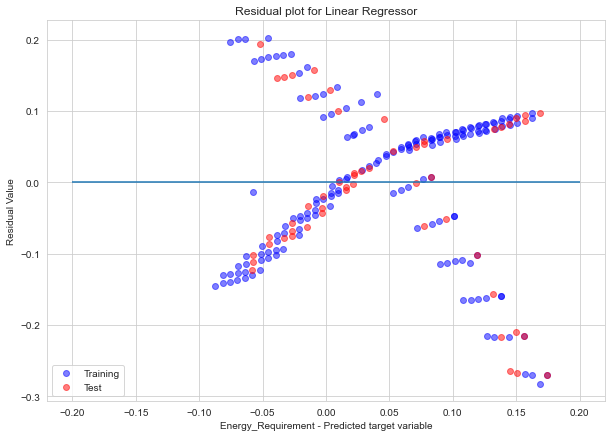

In [91]:
# We want the data points to be scattered around the horizontal line
%matplotlib inline
plt.figure(figsize=(10,7))

residual_train = plt.scatter(pred_train, (pred_train-Y_train), color='b', alpha=0.5) # x tengelyen nem az Y_train, azaz az eredeti y értékek vannak, hanem a becsültek!
residual_test = plt.scatter(pred_test, (pred_test-Y_test), color='r', alpha=0.5) # residual value: becsült - valós, alpha: mennyire áttetsző a szín

plt.hlines(y=0, xmin=-0.2, xmax=0.2) #Plot horizontal lines at each y from xmin to xmax.
#saját kiegészítés
print(pred_test.max(), pred_train.max())

plt.legend((residual_train, residual_test), ('Training', 'Test'), loc='lower left') # legend-t vagy így lehet megadni, vagy a plt.scatter-nél: label = 'Training'

plt.title('Residual plot for Linear Regressor')

plt.xlabel("Energy_Requirement - Predicted target variable")
plt.ylabel("Residual Value")

Residual: MOST becsült - valós (AHOGY MÁSHOL OLVASTAM valós - becsült, de itt fordítva van)<br><br>

AHOGY MÁSHOL OLVASTAM: a legsűrűbb az a balról jobbra felfelé haladó ív, itt van a legtöbb residual value (valós-becsült) érték, ami azt jelenti, hogy: <br>
negatív y értékeknél felébecslés a jellemző (nagyobb becsült értékek mint a valódi -> negatív residual), <br>
pozitív y értékeknél pedig alábecslés a jellemző (kisebb becsült értékek mint a valódi -> pozitív residual)<br>
a training data többször hibázik a másik irányba, tehát kiegyensúlyozottabb az alá-felé becslése<br>
<br>
MOST: 
a legsűrűbb az a bal lentről jobbra felfelé haladó ív, itt van a legtöbb residual value (becsült-valós) érték, ami azt jelenti, hogy: <br>
negatív becsült y értékeknél alábecslés a jellemző (kisebb becsült értékek mint a valódi -> negatív residual), <br>
pozitív becsült y értékeknél pedig felébecslés a jellemző (nagyobb becsült értékek mint a valódi -> pozitív residual)<br>

a training data (kék pontok) többször hibázik ezzel a trenddel (bal lentről-jobbra felfelé ív) ellentétes irányba, tehát kiegyensúlyozottabb az alá-felé becslése


## 7. Random Forest Regressor

This is another type of regression algorithm that uses averaging to improve predictive accuracy (summed up over the number of trees) and controls overfitting.

More on the parameters and information of this regressor can be found here - 

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

#### 7.1 Import the library

In [92]:
# Import Random Forest Regressor from Sklearn
from sklearn.ensemble import RandomForestRegressor

# Instantiate model with 1000 decision trees
rfmodel = RandomForestRegressor(n_estimators = 1000, random_state = 42)

Meaning of some of the hyperparameters used above,

1. `n_estimators`: This is the number of trees you want to build before taking the maximum voting or averages of predictions. Higher number of trees can increase the performance but make your code slower.

2. `random_state`: This parameter makes a solution easy to replicate. A definite value of random_state will always produce same results if given with same parameters and training data.

#### 7.2 Training of the model

In [93]:
# Train the model on training data
rfmodel.fit(X_train, Y_train) # a train X-en és Y-on fittelünk

RandomForestRegressor(n_estimators=1000, random_state=42)

#### 7.3 Prediction

In [94]:
# Use the forest's predict method on the test data | test-en ÉS a train-en is predictel, hogy utána az MSE,MAE és a residual értékeket is össze tudja hasonlítani mindkettő predictre
rf_pred_train = rfmodel.predict(X_train)
rf_pred_test = rfmodel.predict(X_test)

print(rf_pred_train.shape)
rf_pred_train

(163,)


array([ 0.05035665,  0.06575962,  0.13829476,  0.44299964,  0.05396362,
        0.06871671,  0.04073818, -0.1814702 ,  0.01170644,  0.29590224,
       -0.18590459,  0.21115113,  0.04697722, -0.20521519,  0.02515769,
        0.06954973,  0.05271237,  0.03341921,  0.03826379,  0.04546679,
        0.04275059, -0.13468342,  0.02850391,  0.0211032 , -0.05064415,
        0.06894393,  0.20832193,  0.0365352 ,  0.02012854,  0.34749659,
       -0.04944297,  0.01308515, -0.21153593, -0.22683799, -0.22817637,
        0.01012456,  0.27854049,  0.0291024 ,  0.02013882,  0.05268646,
        0.35918262,  0.42590611,  0.00958151,  0.07349629,  0.04175246,
       -0.06022771,  0.06449437,  0.03564744, -0.13263403, -0.24740876,
        0.01660379,  0.04297883,  0.01259903,  0.0356872 ,  0.04967821,
        0.0256465 ,  0.07097718,  0.046013  ,  0.05783827,  0.02993244,
        0.00824033, -0.08742939,  0.0191725 , -0.14241684,  0.05088981,
       -0.22213728,  0.03197647,  0.01278176, -0.26424674,  0.01

#### 7.4 Calculate the different losses (Mean Absolute Error, Mean Square Error)

><font color='white'>**Task:** Complete the following code lines in order to calcute the results according to the Linear Regression!</font>
<br>

In [95]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


# We calulate the errors for the training and test datasets. 
# We save the errors according to the Linear Regression ("MSE_rf_Train_Data", "MAE_rf_Train_Data", "MSE_rf_Test_Data", "MAE_rf_Test_Data").


# Training data
MSE_rf_Train_Data = mean_squared_error(Y_train, rf_pred_train) # y_true, y_pred
MAE_rf_Train_Data = mean_absolute_error(Y_train, rf_pred_train) # y_true, y_pred

print("Mean Square Error on the training data is:", MSE_rf_Train_Data)
print("Mean Absolute Error on the training data is:", MAE_rf_Train_Data)



# Test data / unseen data

#############################
# Please add your code here #
#############################
        
MSE_rf_Test_Data = mean_squared_error(Y_test, rf_pred_test) # y_true, y_pred
MAE_rf_Test_Data = mean_absolute_error(Y_test, rf_pred_test) # y_true, y_pred



print("\n""Mean Square Error on the test data is:", MSE_rf_Test_Data)
print("Mean Absolute Error on the test data is:", MAE_rf_Test_Data)


Mean Square Error on the training data is: 6.304316414527682e-05
Mean Absolute Error on the training data is: 0.002653783773006322

Mean Square Error on the test data is: 0.00017390513802188125
Mean Absolute Error on the test data is: 0.005890728590909198



#### 7.5 Residual plots for Random Forest Regressor

><font color='white'>**Task:** Add a title and the axis labels to the diagram.</font>
<br>


Text(0, 0.5, 'Residual value')

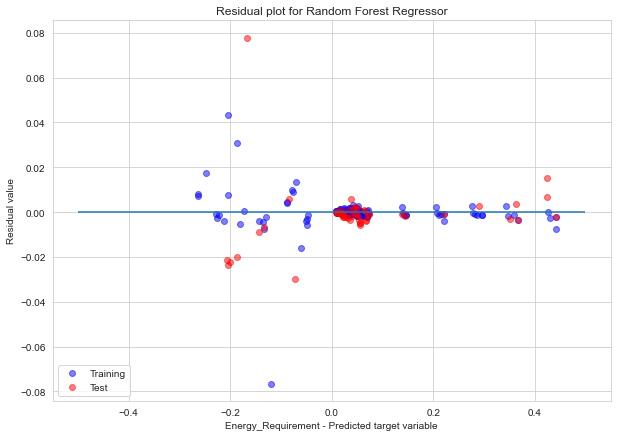

In [96]:
# We want the data points to be scattered around the horizontal line

%matplotlib inline 
#ha az inline-t kiveszem, akkor külön nyitja meg egy nagyon hasznos plot nézőben

plt.figure(figsize=(10,7))

residual_train_rf = plt.scatter(rf_pred_train, (rf_pred_train-Y_train), color='blue', alpha=0.5) # x tengelyen a predictelt érték, azaz predictelt dependent variable
residual_test_rf = plt.scatter(rf_pred_test, (rf_pred_test-Y_test), c='r', alpha=0.5) #  residual (itt): becsült - valós

plt.hlines(y=0, xmin=-0.5, xmax=0.5)

plt.legend((residual_train_rf, residual_test_rf), ('Training', 'Test'), loc='lower left')

#############################
# Please add your code here #
#############################

plt.title('Residual plot for Random Forest Regressor')

plt.xlabel("Energy_Requirement - Predicted target variable")
plt.ylabel("Residual value")

Here we see that the model performs well on both the training dataset as well as the test dataset, as the blue and red points are fairly close to the horizontal line and they are equally distributed.

## 8. Support Vector Regression (SVR)

1. The SVR tries to best approximate a line beween the features in order to predict the target variable.
2. This type of regressor can be used for linear and non-linear regression problems i.e. the best fitting function can be non-linear as well. The kernel functions transform the data into a higher dimensional feature space to make it possible to perform the linear separation.

More information on the parameters and kernels used in the SVR can be found here - 
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html

><font color='white'>**Task:** Implement all the steps used for the Linear Regression model (6.1 to 6.5) to the given Support Vector Regressor. Use the "rbf":Radial Basis Function (Kernel trick 9. slide) kernel. Hint: You just have to copy and partly adapt the existing code</font>
<br>

#### 8.1 Import the library

In [97]:
# Import SVR from Sklearn

#############################
# Please add your code here #
#############################
        
from sklearn.svm import SVR


#### 8.2 Training of the model

In [98]:
# initialize the model and train it

#############################
# Please add your code here #
#############################
        
SVRmodel = SVR(kernel='rbf') # Radial Basis Function kernel

SVRmodel.fit(X_train, Y_train) # train X és Y-on fitteljük

SVR()

#### 8.3 Prediction

In [99]:
# predict the values for the training and test dataset

#############################
# Please add your code here #
#############################


svr_pred_train = SVRmodel.predict(X_train)
print(svr_pred_train.shape)

svr_pred_test = SVRmodel.predict(X_test)
print(svr_pred_test.shape)

(163,)
(55,)


#### 8.4 Calculate the different losses (Mean Absolute Error, Mean Square Error)

In [100]:
# load the libraries and calculate the losses.
# save the errors according to the Linear Regression ("MSE_svr_Train_Data", "MAE_svr_Train_Data", etc.).

#############################
# Please add your code here #
#############################
        

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


# We calulate the error for the training and test datasets

# Training data
MSE_svr_Train_Data = mean_squared_error(Y_train, svr_pred_train) # y_true, y_pred
MAE_svr_Train_Data = mean_absolute_error(Y_train, svr_pred_train) # y_true, y_pred

print("Mean Square Error on the training data is:", MSE_svr_Train_Data)
print("Mean Absolute Error on the training data is:", MAE_svr_Train_Data)

# Test data / unseen data

MSE_svr_Test_Data = mean_squared_error(Y_test, svr_pred_test) # y_true, y_pred
MAE_svr_Test_Data = mean_absolute_error(Y_test, svr_pred_test) # y_true, y_pred


print("\n""Mean Square Error on the test data is:", MSE_svr_Test_Data)
print("Mean Absolute Error on the test data is:", MAE_svr_Test_Data)

Mean Square Error on the training data is: 0.01359525397198958
Mean Absolute Error on the training data is: 0.08173011271299453

Mean Square Error on the test data is: 0.017131732482285424
Mean Absolute Error on the test data is: 0.09284924821367482


#### 8.5 Residual plots for Support Vector Regressor

Text(0, 0.5, 'Residual value')

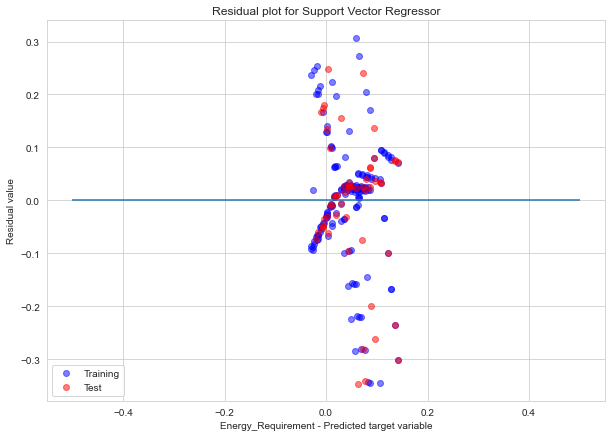

In [101]:
#  visualize the residual plot

#############################
# Please add your code here #
#############################


%matplotlib inline
#inline nélkül külön nyitja meg

plt.figure(figsize=(10,7))

trainplot = plt.scatter(svr_pred_train, (svr_pred_train-Y_train), c='b', alpha=0.5) # x tengelyen a predictelt Y érték
testplot = plt.scatter(svr_pred_test, (svr_pred_test-Y_test), c='r', alpha=0.5) # residual value = becsült - valós

plt.hlines(y=0, xmin=-0.5, xmax=0.5)

plt.legend((trainplot, testplot), ('Training', 'Test'), loc='lower left')

plt.title('Residual plot for Support Vector Regressor')

plt.xlabel("Energy_Requirement - Predicted target variable")
plt.ylabel("Residual value")

jellemző: <br> negatív becsült értékeknél negatív residual value, ami azt jelenti, hogy a (becsült-valós) negatív értéket vesz fel, tehát a valós nagyobb, tehát alábecslés <br>
pozitív becsült értékeknél pozitív residual value, tehát (becsült-valós) pozitív, tehát felülbecslés <br>
ez a Training és Test Datasetre is jellemző

## 9. Comparison and results

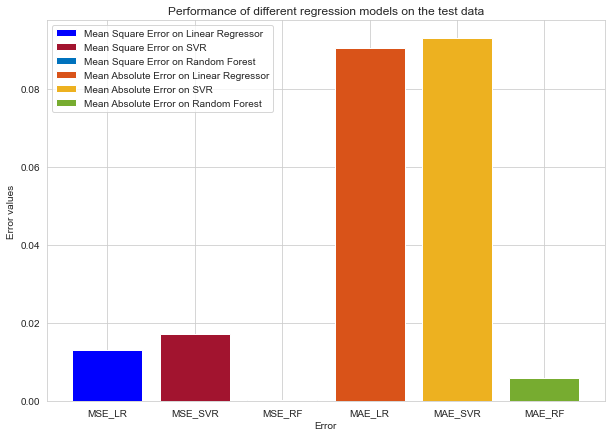

In [102]:
# visualisation of the results
%matplotlib inline 
plt.figure(figsize=(10,7))

plt.bar(x = 'MSE_LR', height = [MSE_linear_Test_Data], color='blue', label="Mean Square Error on Linear Regressor")
plt.bar(x = ['MSE_SVR'], height = [MSE_svr_Test_Data], color='#A2142F', label="Mean Square Error on SVR")
plt.bar(['MSE_RF'], [MSE_rf_Test_Data], color=['#0072BD'], label="Mean Square Error on Random Forest")
#paramétereket szándékosan különböző formára alakítottam

#FONTOS: a Test Data-ra kapott MSE és MAE-ket hasonlítjuk össze

plt.bar(['MAE_LR'],[MAE_linear_Test_Data], color=['#D95319'], label="Mean Absolute Error on Linear Regressor")
plt.bar(['MAE_SVR'],[MAE_svr_Test_Data], color=['#EDB120'], label="Mean Absolute Error on SVR")
plt.bar(['MAE_RF'],[MAE_rf_Test_Data], color=['#77AC30'], label="Mean Absolute Error on Random Forest")

plt.xlabel('Error')
plt.ylabel('Error values')

plt.title('Performance of different regression models on the test data')

plt.legend(loc="upper left")

plt.show()

><font color='white'>**Question:** Explain the results you obtained and choose the best model. </font>
<br>

><font color='white'>**Solution:**
Here we see the performance of the different regression models on the the test dataset. Some of the points that can be observed are,  
1. The Random Forest Regressor has almost zero error on the test dataset. This shows that the model has correctly learned to predict future values.  
2. By comparing our different models we can see that Random Forest Regressor has the highest accuracy follwed by Linear Regressor and Support Vector Regressor.  
3. The accuracy can also be seen by the use of Residual Plots, these plots show us how much the regression line misses the data points and helps us get a better understanding of whether the model can be further improved.
4. It can be said that the Random Forest Regressor does a good job of learning the pattern of the training dataset and applying it to the test dataset to achieve a high accuracy. The remaining models do not achieve this accuracy as they may be not able to learn the patterns effectively enough.  
Therefore we choose the Random Forest Regressor.
<br></font>

## 10. Deployment of the model

Now we want to predict the energy requirement for the following settings of production parameters with the best model. <br>
txt fileban distance helyett path van megadva

 1. Setting 1: axis = 2, feed = 800 [mm/min], distance = 60 [mm] .
 2. Setting 2: axis = 3, feed = 2000 [mm/min], distance = 40 [mm]
 3. Setting 3: axis = 1, feed = 1200 [mm/min], distance = -20 [mm]

><font color='white'>**Task:** Predict the energy requirement for the given production settings using your best model and the `predict()` method. </font>
<br> 

In [110]:
# Deployment of the best model for the production settings.

#############################
# Please add your code here #
#############################
        
proba = np.array([[2, 800, 60]])
print(proba.shape)
proba2 = np.array([[2, 800, 60], [2, 3, 4]])
print(proba2.shape)
#proba3 = np.array([[2, 800, 60], [2, 3]])
#print(proba3.shape)
print ("")


print("Predicted Energy Requirement for setting 1 is", rfmodel.predict([[2, 800, 60]]),"kJ.") #az input 2 dimenziós array, ezért fontos a dupla [[]],
                                                                                         #az első dimenzióban (sorok) csak 1 hosszúságú, 
                                                                                         # a második dimenzióban (oszlopok) 3 hosszúságú 
print("Predicted Energy Requirement for setting 2 is", rfmodel.predict([[3, 2000, 40]]),"kJ.")
print("Predicted Energy Requirement for setting 3 is", rfmodel.predict([[1, 1200, -20]]),"kJ.")

#You can also save the data points within a variable first.
set = [[2, 800, 60], [3, 2000, 40], [1, 1200, -20]]
print("")
print("Set shape:", np.array(set).shape)
print("")

print("saját kiegészítés: Predicted Energy Requirement for each setting is", rfmodel.predict(set),"kJ.")
print(rfmodel.predict(set).shape) # ez csak 1 dimenziós (1 sorban 3 oszlop)
print("")

print("Predicted Energy Requirement for all settings is", sum(rfmodel.predict(set)), "kJ.")

(1, 3)
(2, 3)

Predicted Energy Requirement for setting 1 is [0.05393712] kJ.
Predicted Energy Requirement for setting 2 is [0.28716838] kJ.
Predicted Energy Requirement for setting 3 is [0.02084422] kJ.

Set shape: (3, 3)

saját kiegészítés: Predicted Energy Requirement for each setting is [0.05393712 0.28716838 0.02084422] kJ.
(3,)

Predicted Energy Requirement for all settings is 0.36194972549999915 kJ.


><font color='white'>**Question:** What is the difference between parameters and hyperparameters of a model? Name an example for both.</font>
<br> 

><font color='white'>**Solution:**   A model **parameter** is a configuration variable which is internal to the model (tehát nem lehet megadni, magának kalkulálja) and whose value can be estimated from data. <br> <br> 
•	They are the result of the training process   
•	They are required by the model when making predictions.   
•	Example Random Forest: the threshold value (küszöb érték) chosen at each internal node of the decision tree(s): nincs ez a paraméter a kódban, magának kalkulálja a model fitteléskor <br> <br>
A model **hyperparameter** is a configuration that is external to the model (mi adjuk meg, nem magának kalkulálja) and whose value cannot be estimated from data.  <br>
•	They define the training process.  
•	They can often be set using heuristics / They are often tuned for a given predictive modeling problem. (szóval egy adott problémára tuneoljuk, hogy arra jó legyen a model) <br>
•	Example Random Forest: the number of decision trees: "n_estimators = 1000 -rel adtuk meg)

<br></font>